<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Lasso_Regression_Key_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lasso Regression :Key Points :--

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [22]:
from sklearn.datasets import load_diabetes
data=load_diabetes()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

In [23]:
df.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
189,-0.001882,-0.044642,-0.066563,0.001215,-0.002945,0.003070,0.011824,-0.002592,-0.020292,-0.025930,79.0
201,-0.034575,0.050680,-0.055785,-0.015999,-0.009825,-0.007890,0.037595,-0.039493,-0.052963,0.027917,39.0
357,-0.060003,0.050680,0.049840,0.018430,-0.016704,-0.030124,-0.017629,-0.002592,0.049770,-0.059067,221.0
230,-0.038207,0.050680,0.071397,-0.057313,0.153914,0.155887,0.000779,0.071948,0.050281,0.069338,220.0
217,0.074401,-0.044642,0.031517,0.101058,0.046589,0.036890,0.015505,-0.002592,0.033654,0.044485,296.0


In [24]:
df.shape

(442, 11)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2,random_state=2)
X_train.shape, X_test.shape

((353, 10), (89, 10))

#1.How Coefficients are get affected with alpha(lambda) :-

In [26]:
r2_scores=[]
coeff=[]
alphas=[0,0.1,1,10]

for alpha in alphas:
  model=Lasso(alpha=alpha)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  r2_scores.append(r2_score(y_test,y_pred))
  coeff.append(model.coef_.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Text(0.5, 1.0, 'alpha=10 , r2_score=-0.01')

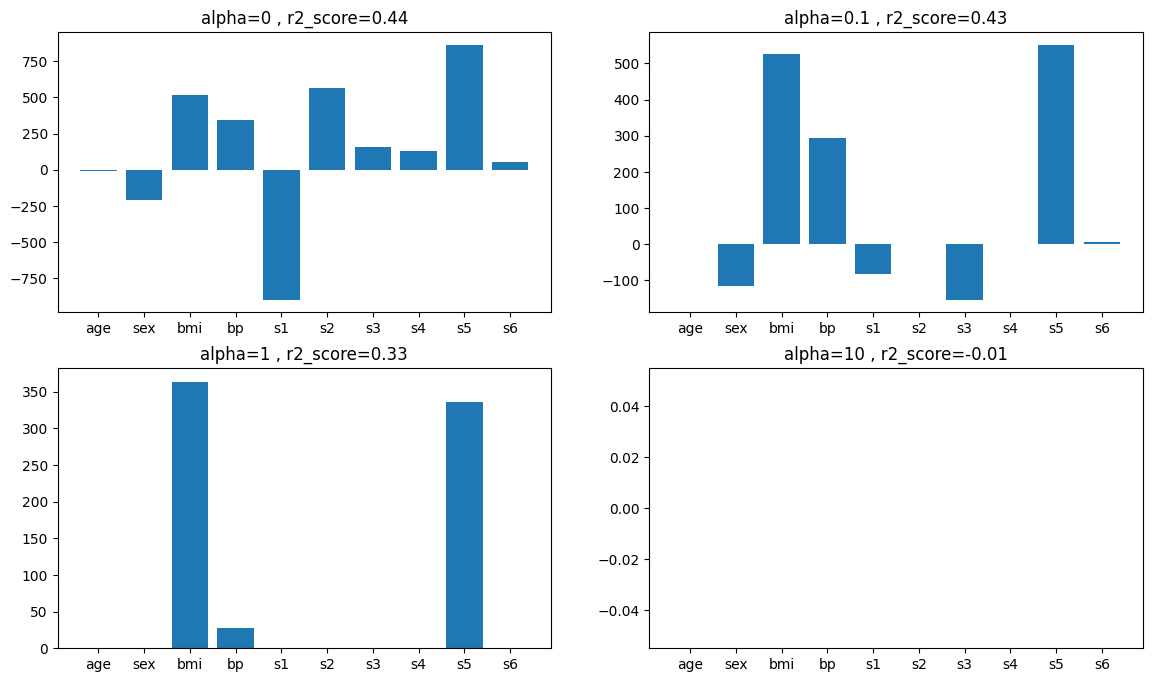

In [27]:
plt.figure(figsize=(14,8))
plt.subplot(221)
plt.bar(data.feature_names,coeff[0])
plt.title('alpha=0 , r2_score={}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coeff[1])
plt.title('alpha=0.1 , r2_score={}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coeff[2])
plt.title('alpha=1 , r2_score={}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coeff[3])
plt.title('alpha=10 , r2_score={}'.format(round(r2_scores[3],2)))

#Higher coefficients are affected more :-

In [28]:
coeff=[]
alphas=[0,0.001,0.01,0.1,1,10,100,100]

for alpha in alphas:
  model=Lasso(alpha=alpha)
  model.fit(X_train,y_train)
  coeff.append(model.coef_.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [29]:
coeff_array=np.array(coeff)
coeff_df=pd.DataFrame(coeff_array,columns=data.feature_names)
coeff_df["alpha"]=alphas
coeff_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.001,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.010,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.100,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [30]:
coeff=[]
alphas=[0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

for alpha in alphas:
  model=Lasso(alpha=alpha)
  model.fit(X_train,y_train)
  coeff.append(model.coef_.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [31]:
coeff_array=np.array(coeff).T
coeff_array

array([[  -9.15865318,   -9.06906443,   -8.71071024,   -8.26276976,
          -4.77600277,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [-205.45432152, -205.32940644, -204.82978472, -204.20536429,
        -199.20681814, -113.96992829,   -0.        ,    0.        ,
           0.        ,    0.        ],
       [ 516.69374477,  516.78941848,  517.17203171,  517.65007282,
         521.49414975,  526.74439601,  473.19694059,  363.88574216,
           0.        ,    0.        ],
       [ 340.61999899,  340.53237885,  340.18191887,  339.7439007 ,
         336.30597086,  292.62847198,  155.44993319,   27.27316304,
           0.        ,    0.        ],
       [-895.55198905, -888.66090377, -861.10104382, -826.6636033 ,
        -569.68970114,  -82.69368149,   -0.        ,    0.        ,
           0.        ,    0.        ],
       [ 561.22066898,  555.95858353,  534.91374825,  508.61739504,
         311.11565522,   -0.        ,   -0.        ,    0

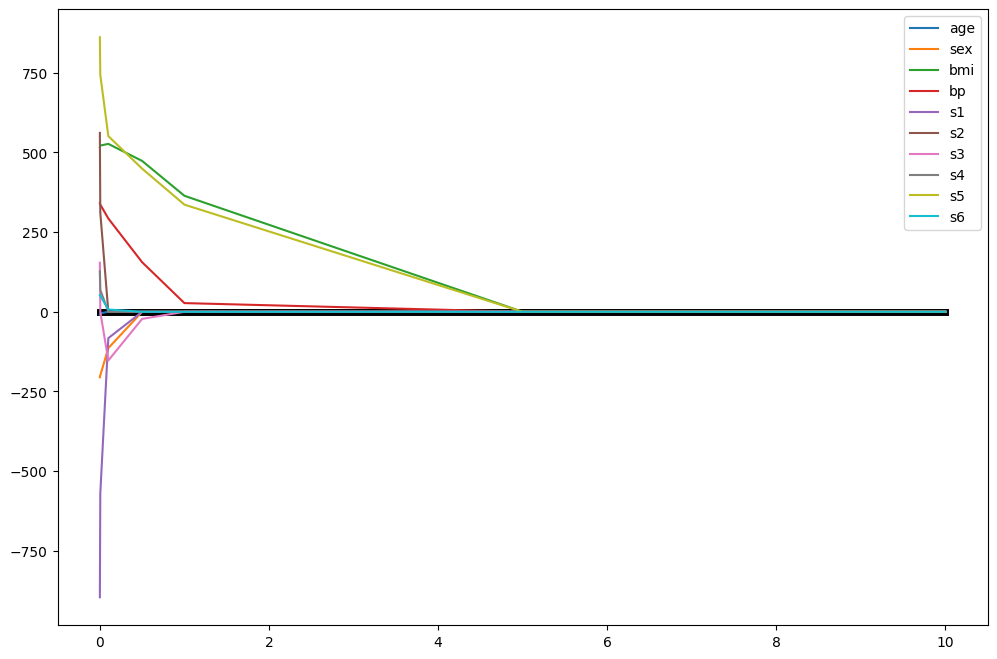

In [32]:
plt.figure(figsize=(12,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(coeff_array.shape[0]):                        #it is basically the values of for different value of alpha
  plt.plot(alphas,coeff_array[i],label=data.feature_names[i])   #for ex: alpha=[1,2,3] --> coeff_x1=[12,3,0.8]
plt.legend()
plt.show()

#3.Impacts of alpha on bias and variance :-

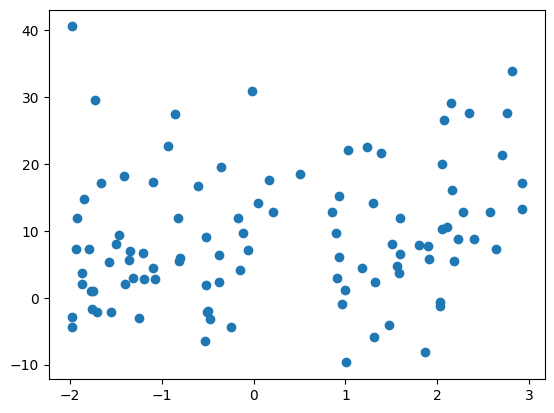

In [33]:
m=100
X=5*np.random.rand(m,1) - 2
y=0.7*X**2 - 2*y + 3 + np.random.randn(m,1)
plt.scatter(X,y)
plt.show()

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=10)
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)

In [41]:
from mlxtend.evaluate import bias_variance_decomp
alphas=np.linspace(0,30,100)

loss=[]
bias=[]
variance=[]

for i in alphas:
  model=Lasso(alpha=i)
  avg_expected_loss, avg_bias, avg_var= bias_variance_decomp(
      model, X_train, y_train, X_test, y_test,
      loss='mse',
      random_seed=123)
  loss.append(avg_expected_loss)
  bias.append(avg_bias)
  variance.append(avg_var)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.837e+03, tolerance: 7.043e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.247e+01, tolerance: 7.297e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

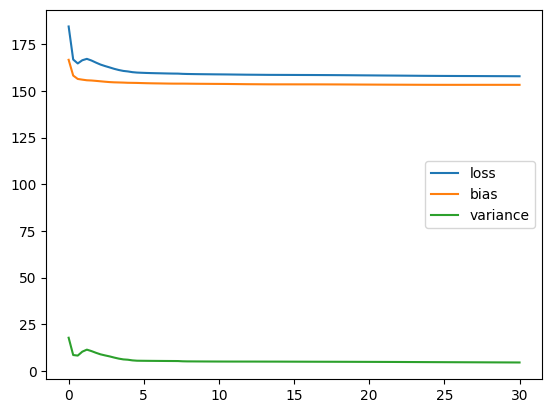

In [43]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='bias')
plt.plot(alphas,variance,label='variance')
plt.legend()
plt.show()

#4.Effect of regularization on loss function:-

[27.65768923]
-2.245336569074901


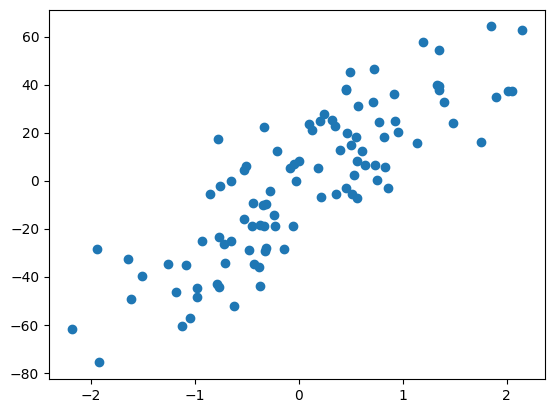

In [44]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20 ,random_state=13)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)
plt.scatter(X,y)

In [45]:
def call_loss(m,alpha):
  return np.sum((y-m*X.ravel()+2.29)**2) +alpha*abs(m)

In [47]:
def predict(m):
  return m*X-2.29

In [50]:
m=np.linspace(-45,100,100)
m.shape

(100,)

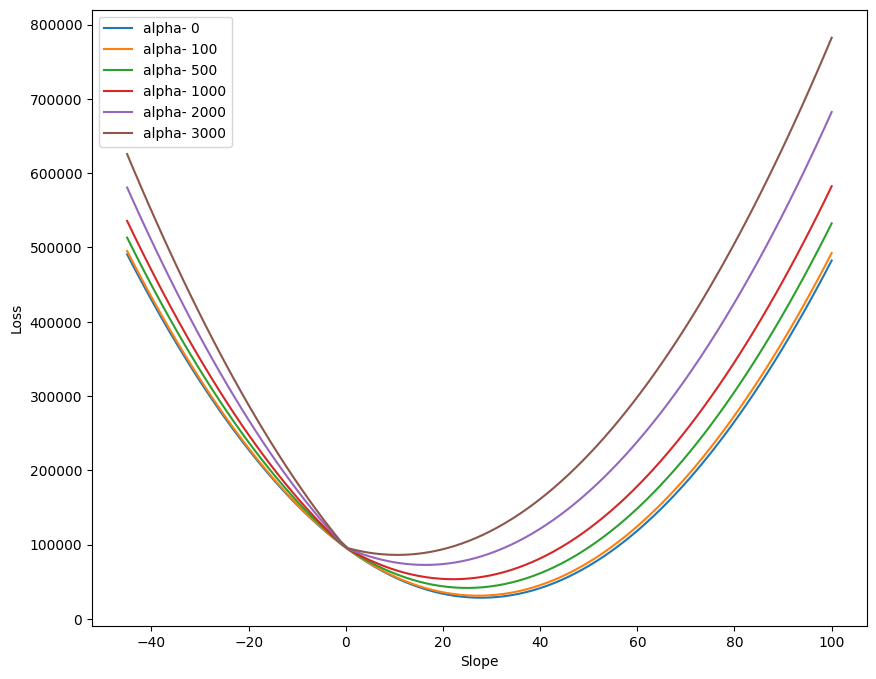

In [56]:
m=np.linspace(-45,100,100)
plt.figure(figsize=(10,8))
for i in [0,100,500,1000,2000,3000]:
  loss=[]
  for j in range(m.shape[0]):
    loss_i=call_loss(m[j],i)
    loss.append(loss_i)

  plt.plot(m,loss,label='alpha- {}'.format(i))

plt.legend()
plt.xlabel("Slope")
plt.ylabel("Loss")
plt.show()
